In [73]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import librosa
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import speech_recognition as sr

In [74]:
# Loading the dataset
df = pd.read_csv('cleaned_emotion.csv')

In [75]:
# Encoding the labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [76]:
# Defining features and target
X = df.drop('label', axis=1)
y = df['label']

In [77]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Training an SVM classifier
svm_model = SVC(C=1000, gamma=0.01)
svm_model.fit(X_train, y_train)

SVC(C=1000, gamma=0.01)

In [79]:
# Evaluating the SVM model and print the classification report
svm_y_pred = svm_model.predict(X_test)
svm_classification_report = classification_report(y_test, svm_y_pred, target_names=label_encoder.classes_)

print("SVM Emotion Prediction:", svm_emotion_prediction)
print("\nSVM Classification Report:\n", svm_classification_report)

SVM Emotion Prediction: sad

SVM Classification Report:
               precision    recall  f1-score   support

       angry       0.92      0.96      0.94        56
       happy       0.92      0.86      0.89        63
         sad       0.89      0.90      0.90        63

    accuracy                           0.91       182
   macro avg       0.91      0.91      0.91       182
weighted avg       0.91      0.91      0.91       182



In [80]:
# Defining a function for emotion prediction from voice using the trained SVM
def predict_emotion(audio_file_path):
    try:
        audio, _ = librosa.load(audio_file_path, sr=22050, duration=2.5)

        # Extract all the features from your dataset
        features = []
        for feature_name in X.columns:
            # Extract each feature from the audio
            feature_value = np.mean(librosa.feature.mfcc(y=audio, sr=22050, n_mfcc=13))
            features.append(feature_value)

        # Flatten the list of features into a single feature vector
        feature_vector = np.hstack(features)

        # Make predictions using the trained SVM model
        svm_prediction = svm_model.predict([feature_vector])[0]

        # Convert label encoding back to original labels
        svm_emotion = label_encoder.inverse_transform([svm_prediction])[0]

        return svm_emotion
    except Exception as e:
        return {"error": str(e)}

In [86]:
# Defining a function for keyword detection
def detect_keyword(audio_file_path, keyword):
    recognizer = sr.Recognizer()

    # Load audio from file
    with sr.AudioFile(audio_file_path) as source:
        audio_data = recognizer.record(source)

    try:
        # Perform speech recognition
        detected_text = recognizer.recognize_google(audio_data)

        # Check if the keyword is present in the detected text
        if keyword in detected_text.lower():
            return "Keyword Detected"
        else:
            return "Keyword Not Detected"
    except sr.UnknownValueError:
        return "Speech Recognition could not understand audio"
    except sr.RequestError as e:
        return f"Could not request results from Google Speech Recognition service; {e}"

In [82]:
# List of audio file paths
audio_file_paths = ['000 (1).wav', '000 (2).wav', '000 (3).wav']
keyword_to_detect = "bad"
# Predicting emotions and creating a table
emotion_predictions = []
for audio_file_path in audio_file_paths:
    predicted_emotion = predict_emotion(audio_file_path)
    emotion_predictions.append({"Audio File": audio_file_path, "Predicted Emotion": predicted_emotion})

predictions_df = pd.DataFrame(emotion_predictions)

# Printing the table
print(predictions_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


    Audio File Predicted Emotion
0  000 (1).wav               sad
1  000 (2).wav               sad
2  000 (3).wav               sad


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


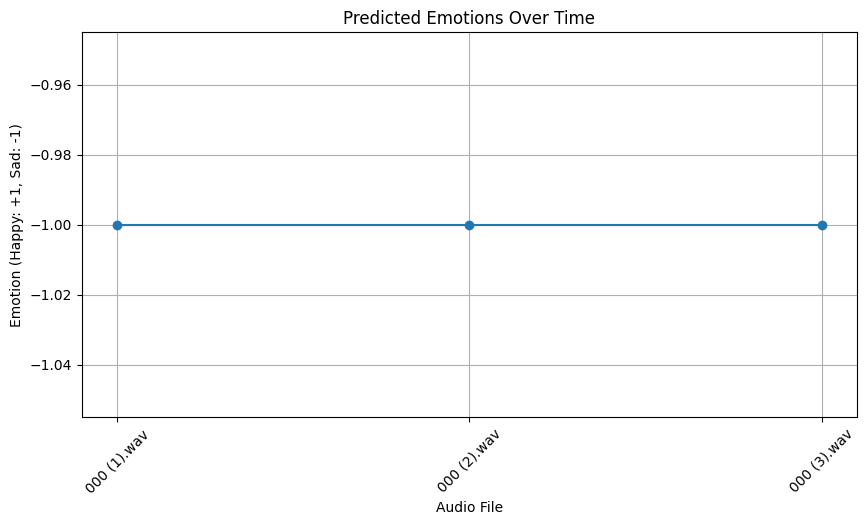

In [83]:
# Plotting the predicted emotions in a smooth line chart
plt.figure(figsize=(10, 5))
time_points = range(len(audio_file_paths))
predicted_emotions = [1 if emotion == 'happy' else -1 for emotion in predictions_df['Predicted Emotion']]
plt.plot(time_points, predicted_emotions, marker='o', linestyle='-')
plt.xticks(time_points, audio_file_paths, rotation=45)
plt.xlabel("Audio File")
plt.ylabel("Emotion (Happy: +1, Sad: -1)")
plt.title("Predicted Emotions Over Time")
plt.grid()
plt.show()

In [87]:
# Detecting keywords and creating a table
keyword_detections = []
for audio_file_path in audio_file_paths:
    detection_result = detect_keyword(audio_file_path, keyword_to_detect)
    keyword_detections.append({"Audio File": audio_file_path, "Keyword Detection Result": detection_result})

detections_df = pd.DataFrame(keyword_detections)

# Printing the table
print(detections_df)

    Audio File                       Keyword Detection Result
0  000 (1).wav                           Keyword Not Detected
1  000 (2).wav  Speech Recognition could not understand audio
2  000 (3).wav                           Keyword Not Detected


In [67]:
# Example usage for user to upload his voice and tesy his prediction:
audio_file_path = '000 (1).wav'  # Replace with the path to your audio file
svm_emotion_prediction = predict_emotion(audio_file_path)
print("Prediction for the uploaded voice:",svm_emotion_prediction)

Prediction for the uploaded voice: sad


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
